In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('/home/raid/Desktop/Shubh/DLProject/experiments')

from helpers.trainer import Trainer
from helpers.train_all import TrainerAll
from helpers.train_all_2 import TrainerAll2

In [2]:
# from torch_optimizer import Adahessian

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
# Defining batch size as given on page 7 on Adam Research Paper
batch_size = 64  

# Calculate the number of workers to use for DataLoader
num_workers = 8

# transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

In [5]:
os.chdir('/home/raid/Desktop/Shubh/DLProject/experiments/models')

# MNIST dataset
train_dataset = datasets.MNIST(root='../../datasets/',
                               train=True,
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='../../datasets/',
                                train=False,
                                transform=transform)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=num_workers)

In [6]:
# defining the model optimizer.step()
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        # self.fc1 = nn.Linear(784, 64)

        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        # x = F.softmax(x, dim=1)
        
        return x

In [7]:
criterion = nn.CrossEntropyLoss()
epochs = 100

optimizer = optim.Adam

In [8]:
model = NN().to(device)
trainer = TrainerAll2(train_loader, test_loader, criterion, epochs=30)

head1, head2, head3 = 'EPOCHS', 'TRAIN LOSS', 'VAL LOSS'
print(f'{head1 :>6} {head2 :>25} {head3 :>25}')

log = trainer.train_all_optim(model)

EPOCHS                TRAIN LOSS                  VAL LOSS
Optimizer : Adam_torch
Epoch:  1


/home/raid/miniconda3/envs/dl/lib/python3.12/site-packages/torch/autograd/__init__.py:266: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1177.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch:  2
Epoch:  3
Epoch:  4
var loss:  3099.1784892291817
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
var loss:  26.522267962394718
Epoch:  9
Epoch:  10
    10      0.020936522379418912       0.09116764649328396
Epoch:  11
Epoch:  12
var loss:  8.8126500084936
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
var loss:  3.315024730333655
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
var loss:  2.2661423501833116
    20      0.011510998640551115       0.13157561432147283
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
var loss:  4.339531797506953
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
var loss:  6.10833460387902
Epoch:  29
Epoch:  30
    30      0.011040594977816157       0.10299757758339517
Optimizer : RMS_torch
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
var loss:  5202.107887723232
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
var loss:  24.243825488904804
Epoch:  9
Epoch:  10
    10       0.02425023580626558       0.08683621803408068
Epoch:  11
Epoch:  12
var loss:  7.824591986898667
Epoch:  13
Epoch:

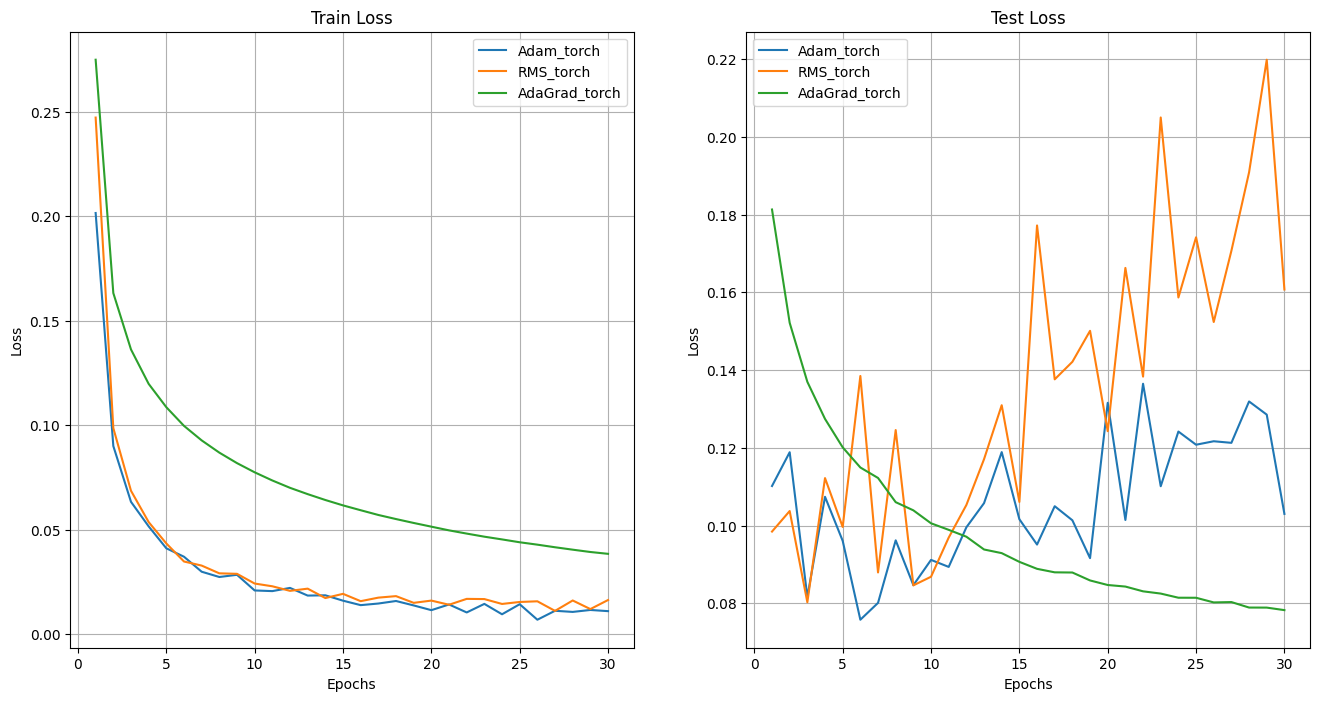

In [9]:
trainer.plot_loss_graphs()

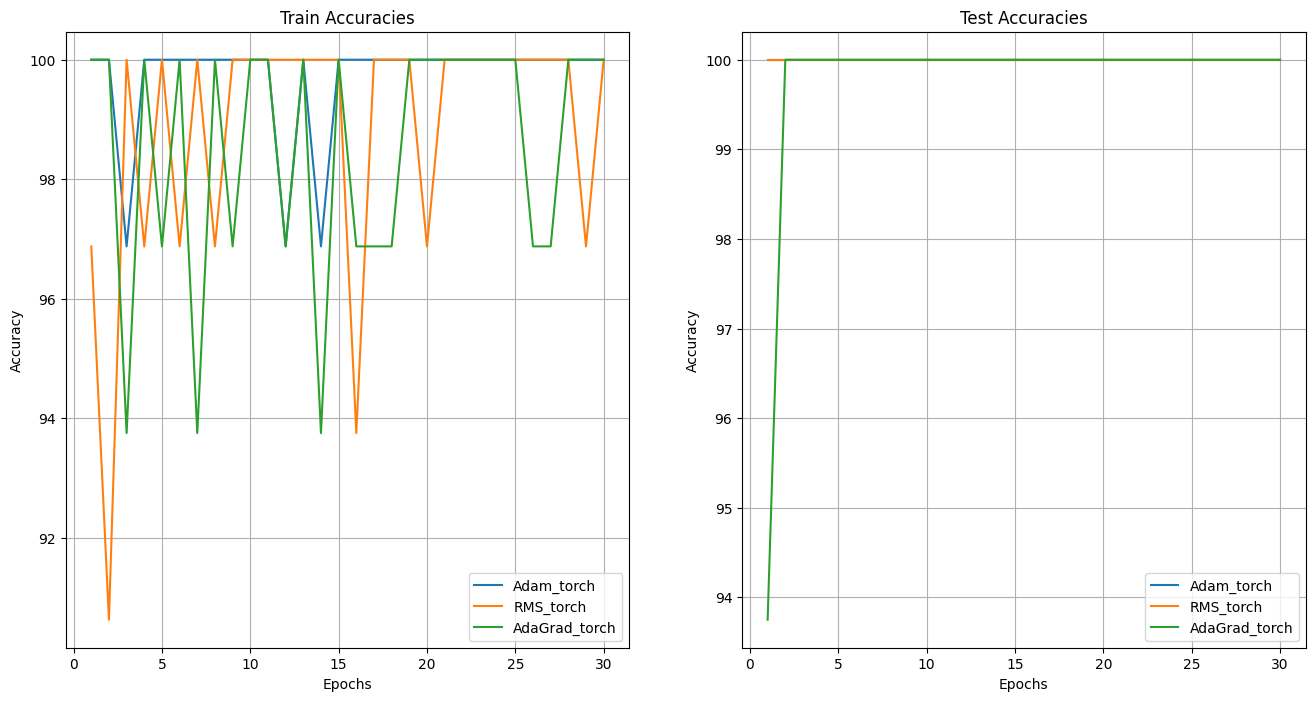

In [10]:
trainer.plot_acc_graphs()


In [11]:
import json

with open('../results/logs/MNIST_DNN.json', 'w', encoding ='utf8') as file: 
    json.dump(log, file, ensure_ascii = False, indent=4) 

In [2]:
import torch
from torch import autograd
x = torch.tensor(1., requires_grad = True)
y = torch.tensor(2., requires_grad = True)
z = torch.tensor(3., requires_grad = True)
l = x*y*z
print(l)
first_derivative = autograd.grad(l, [x,y,z],create_graph=True,allow_unused=True)
# We now have dloss/dx
print(first_derivative)
second_derivative = autograd.grad(first_derivative, [x,y,z],create_graph=True,allow_unused=True)
print(second_derivative)

# print(first_derivative.grad,second_derivative.grad)


tensor(6., grad_fn=<MulBackward0>)
(tensor(6., grad_fn=<MulBackward0>), tensor(3., grad_fn=<MulBackward0>), tensor(2., grad_fn=<MulBackward0>))
(tensor(5., grad_fn=<AddBackward0>), tensor(4., grad_fn=<AddBackward0>), tensor(3., grad_fn=<MulBackward0>))
